In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#daten aus csv einlesen
df = pd.read_csv('Big5.csv')
df.head()

,1_Player,2_Nation,3_Pos,4_Squad,5_Comp,6_Age,7_Born,Playing Time_MP,Playing Time_Starts,Playing Time_Min,...,Expected_xG,Expected_npxG,Expected_xA,Expected_npxG+xA,Per 90 Minutes_xG,Per 90 Minutes_xA,Per 90 Minutes_xG+xA,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xA,33_Matches
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-070,2000,28,27,2398,...,0.7,0.7,1.0,1.6,0.02,0.04,0.06,0.02,0.06,Matches
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-168,1987,25,25,2173,...,1.0,1.0,0.2,1.2,0.04,0.01,0.05,0.04,0.05,Matches
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-354,2000,25,24,2057,...,0.7,0.7,0.9,1.6,0.03,0.04,0.07,0.03,0.07,Matches
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-042,1993,24,24,2089,...,1.8,1.8,2.1,3.8,0.08,0.09,0.17,0.08,0.17,Matches
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-337,2000,1,1,45,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


In [17]:
#Daten enthalten "header"-daten welche immer mit "player beginnen" -> bereinigen
players = df['1_Player']
df = df[players != 'Player']
players.duplicated(keep='first').sum()



245

In [18]:
#Goals und Assists in Integer umwandeln
df['Performance_Gls'] = df['Performance_Gls'].astype('int64')
df['Performance_Ast'] = df['Performance_Ast'].astype('int64')
df.dtypes

1_Player                  object
2_Nation                  object
3_Pos                     object
4_Squad                   object
5_Comp                    object
6_Age                     object
7_Born                    object
Playing Time_MP           object
Playing Time_Starts       object
Playing Time_Min          object
Playing Time_90s          object
Performance_Gls            int64
Performance_Ast            int64
Performance_G-PK          object
Performance_PK            object
Performance_PKatt         object
Performance_CrdY          object
Performance_CrdR          object
Per 90 Minutes_Gls        object
Per 90 Minutes_Ast        object
Per 90 Minutes_G+A        object
Per 90 Minutes_G-PK       object
Per 90 Minutes_G+A-PK     object
Expected_xG               object
Expected_npxG             object
Expected_xA               object
Expected_npxG+xA          object
Per 90 Minutes_xG         object
Per 90 Minutes_xA         object
Per 90 Minutes_xG+xA      object
Per 90 Min

In [19]:
# Erkentniss: Es gibt Dublikate weil gewisse Spieler bei meherern Teams gespielt haben 
# -> Assists und Goals summieren und dublikate "droppen"

df['Performance_Gls'] = df.groupby('1_Player')['Performance_Gls'].transform('sum')
df['Performance_Ast'] = df.groupby('1_Player')['Performance_Ast'].transform('sum')
df = df.drop_duplicates(subset='1_Player')

In [20]:
df.shape

(2664, 33)

In [23]:
#Nur die "spannenden" Spalten behalten
df1 = df[['1_Player', '3_Pos', '4_Squad', '6_Age', 'Performance_Gls', 'Performance_Ast']]
df1.head()

df1.to_csv('Big5_bereinigt.csv',index=False)

In [24]:
df1.describe()

,Performance_Gls,Performance_Ast
count,2664.000000,2664.000000
mean,1.373498,0.930931
std,2.546110,1.559111
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,1.000000
max,29.000000,16.000000


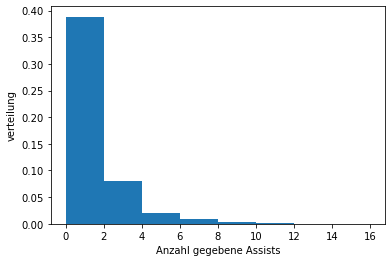

In [36]:
#
plt.hist(df1['Performance_Ast'], bins=8, density=True)
plt.xlabel('Anzahl gegebene Assists')
plt.ylabel('verteilung')
plt.show()

In [57]:
df1['Performance_Ast'].value_counts()

0     1526
1      544
2      276
3      151
4       60
5       43
6       22
7       22
9        7
8        6
10       3
11       3
16       1
Name: Performance_Ast, dtype: int64

In [58]:
#googled
def verteilung(df1):
    # n - number of data points
    n = len(df1)
    # x - x-data for ECDF
    x = np.sort(df1)
    # y - y-data for ECDF
    y = np.arange(1, n+1) / n
    print(n)
    return x, y

2664


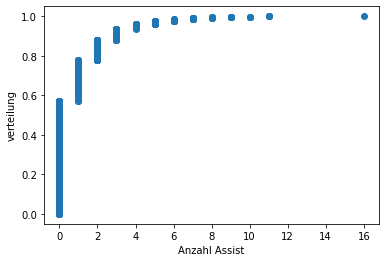

In [59]:
# Verteilung der Assists in plot
#n - number of data points
x, y = verteilung(df1['Performance_Ast'])
#plot
plt.scatter(x, y)
plt.xlabel('Anzahl Assist')
plt.ylabel('verteilung')
plt.show()


In [ ]:
#Aussagen die sich machen lassen: Bspw. 60% aller 2664 Spieler haben keinen Assist in dieser Saison

In [64]:
df1['3_Pos'].value_counts()


DF       868
MF       569
FW       371
FW,MF    268
MF,FW    222
GK       187
DF,MF     66
MF,DF     56
DF,FW     31
FW,DF     25
GK,MF      1
Name: 3_Pos, dtype: int64

In [67]:
ast_goalies = df1[df1['3_Pos'] == 'GK']['Performance_Ast'].sum()
#Assists von Goalies in den Top 5 Ligen
print(ast_goalies)

11


In [69]:
#Goalies entfernen... da die keinen Sinn machen
df = df[df['3_Pos'] != 'GK']
df = df[df['3_Pos'] != 'GK,MF']
df['3_Pos'].value_counts()

DF       868
MF       569
FW       371
FW,MF    268
MF,FW    222
DF,MF     66
MF,DF     56
DF,FW     31
FW,DF     25
Name: 3_Pos, dtype: int64